## Introduction

This is a project about conducting data analysis on TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
   * Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
   * There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
   * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

This project is trying to answer the following questions:
   * What kinds of properties are associated with movies that have high revenues?
   * Which genres are most popular from year to year?

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

import utils.helper as helper

---
## Data Wrangling

In [2]:
data_filepath = os.path.join('./data', 'tmdb-movies.csv')

df = pd.read_csv(data_filepath)

In [3]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
'''
Remove all entries without id or imdb_id
'''
df.dropna(subset=['id', 'imdb_id'], inplace=True)

In [6]:
'''
Replace all null values with empty strings
'''
df[['genres', 'cast', 'director', 'tagline', 'keywords', 'production_companies', 'homepage', 'overview']] = \
    df[['genres', 'cast', 'director', 'tagline', 'keywords', 'production_companies', 'homepage', \
       'overview']].fillna(value='')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10856 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10856 non-null  float64
 3   budget                10856 non-null  int64  
 4   revenue               10856 non-null  int64  
 5   original_title        10856 non-null  object 
 6   cast                  10856 non-null  object 
 7   homepage              10856 non-null  object 
 8   director              10856 non-null  object 
 9   tagline               10856 non-null  object 
 10  keywords              10856 non-null  object 
 11  overview              10856 non-null  object 
 12  runtime               10856 non-null  int64  
 13  genres                10856 non-null  object 
 14  production_companies  10856 non-null  object 
 15  release_date       

In [8]:
'''
Generate new pandas frame with only limited entries. In addition, uses one hot encoding for different genres
'''

new_df = df[['id', 'revenue', 'release_year', 'popularity']]

new_df = pd.concat([new_df, df.genres.str.get_dummies(sep='|')],1)

---
## Question 1: What kinds of properties are associated with movies that have high revenues?

In [9]:
df['revenue'].describe()

count    1.085600e+04
mean     3.986000e+07
std      1.170511e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.404690e+07
max      2.781506e+09
Name: revenue, dtype: float64

Text(0, 0.5, 'Revenue')

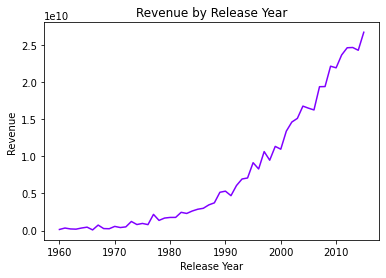

In [10]:
revenue_by_year = helper.generate_revenue_data_by_key('release_year', new_df)

plt.plot(revenue_by_year.index, revenue_by_year)

plt.title('Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')

#### Summary: 
There is a positive correlation between release year and revenue.

---

Text(0, 0.5, 'Revenue')

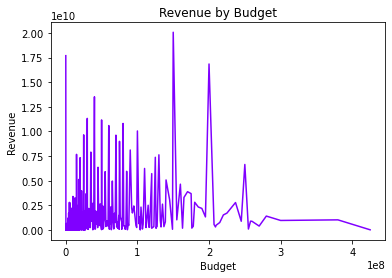

In [11]:
revenue_by_budget = helper.generate_revenue_data_by_key('budget', df)

plt.plot(revenue_by_budget.index, revenue_by_budget)

plt.title('Revenue by Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')

#### Summary: 
* There is no correlation between budget and revenue
* Highest revenue when budget = 2 * (e**10)

---

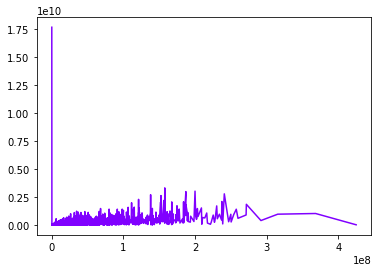

In [12]:
revenue_by_budget_adj = helper.generate_revenue_data_by_key('budget_adj', df)

plt.plot(revenue_by_budget_adj.index, revenue_by_budget_adj)

#### Summary: 
There is no correlation between budget in terms of 2010 dollars and revenue.

---

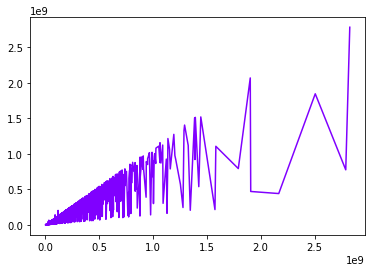

In [13]:
revenue_by_revenue_adj = helper.generate_revenue_data_by_key('revenue_adj', df)

plt.plot(revenue_by_revenue_adj.index, revenue_by_revenue_adj)

#### Summary: 
There is no correlation between revenue in terms of 2010 dollars and revenue.

---

In [14]:
revenue_by_adventure = helper.generate_revenue_data_by_key('Adventure', new_df)
revenue_by_action = helper.generate_revenue_data_by_key('Action', new_df)
revenue_by_fantasy = helper.generate_revenue_data_by_key('Fantasy', new_df)
revenue_by_family = helper.generate_revenue_data_by_key('Family', new_df)
revenue_by_sf = helper.generate_revenue_data_by_key('Science Fiction', new_df)
revenue_by_animation = helper.generate_revenue_data_by_key('Animation', new_df)
revenue_by_war = helper.generate_revenue_data_by_key('War', new_df)
revenue_by_thriller = helper.generate_revenue_data_by_key('Thriller', new_df)
revenue_by_crime = helper.generate_revenue_data_by_key('Crime', new_df)
revenue_by_mystery = helper.generate_revenue_data_by_key('Mystery', new_df)
revenue_by_history = helper.generate_revenue_data_by_key('History', new_df)
revenue_by_western = helper.generate_revenue_data_by_key('Western', new_df)
revenue_by_comedy = helper.generate_revenue_data_by_key('Comedy', new_df)
revenue_by_romance = helper.generate_revenue_data_by_key('Romance', new_df)
revenue_by_music = helper.generate_revenue_data_by_key('Music', new_df)
revenue_by_tm = helper.generate_revenue_data_by_key('TV Movie', new_df)
revenue_by_foreign = helper.generate_revenue_data_by_key('Foreign', new_df)
revenue_by_documentary = helper.generate_revenue_data_by_key('Documentary', new_df)
revenue_by_drama = helper.generate_revenue_data_by_key('Drama', new_df)
revenue_by_horror = helper.generate_revenue_data_by_key('Horror', new_df)

Text(0, 0.5, 'Revenue')

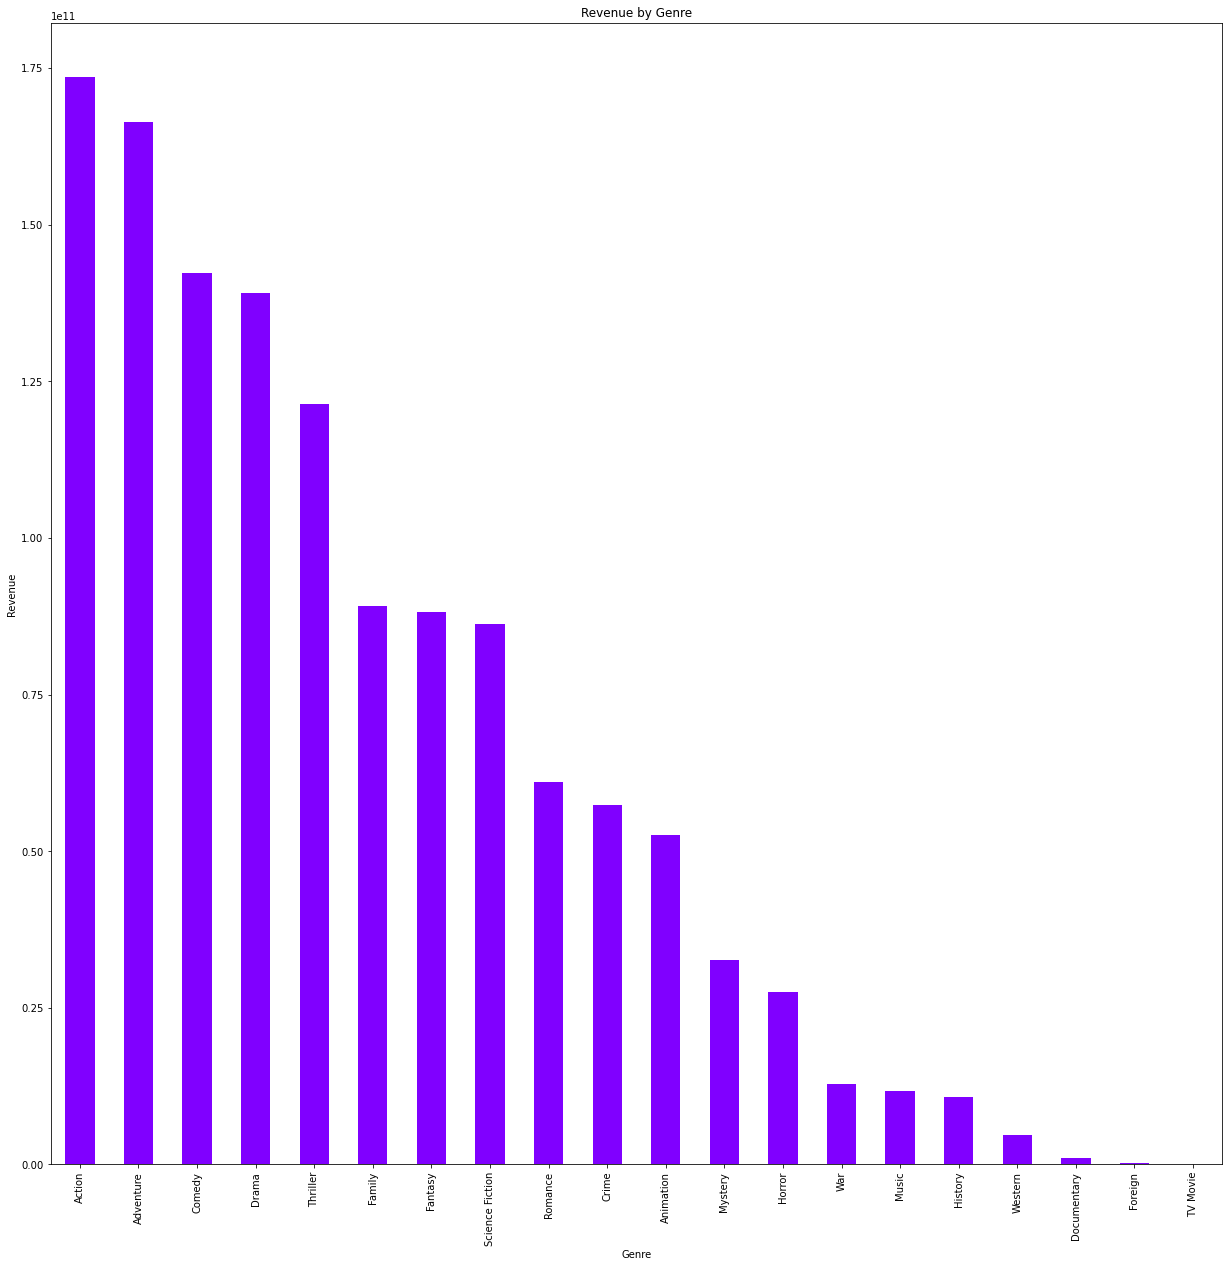

In [15]:
data = np.array([
    revenue_by_adventure, 
    revenue_by_action,
    revenue_by_fantasy,
    revenue_by_family,
    revenue_by_sf,
    revenue_by_animation,
    revenue_by_war,
    revenue_by_thriller,
    revenue_by_crime,
    revenue_by_mystery,
    revenue_by_history,
    revenue_by_western,
    revenue_by_comedy,
    revenue_by_romance,
    revenue_by_music,
    revenue_by_tm,
    revenue_by_foreign,
    revenue_by_documentary,
    revenue_by_drama,
    revenue_by_horror
])

index = np.array([
    'Adventure',
    'Action',
    'Fantasy',
    'Family',
    'Science Fiction',
    'Animation',
    'War',
    'Thriller',
    'Crime',
    'Mystery',
    'History',
    'Western',
    'Comedy',
    'Romance',
    'Music',
    'TV Movie',
    'Foreign',
    'Documentary',
    'Drama',
    'Horror'
])

genres_revenue_df = pd.DataFrame(data, index=index)

ax = genres_revenue_df[1].sort_values(ascending=False).plot.bar(figsize=(21, 21))

ax.set_title('Revenue by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Revenue')

#### Summary: 

Genres that have high revenues (Top 3): 
* Action
* Adventure
* Comedy


---

In [16]:
helper.generate_revenue_data_by_key('cast', df).sort_values(ascending=False)

cast
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    2916544743
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez        2781505847
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    2189157571
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley                    2068178225
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              1913519788
                                                                                       ...    
John Wayne|Lee Marvin|Elizabeth Allen|Jack Warden|Cesar Romero                               0
John Wayne|Maureen O'Hara|Patrick Wayne|Stefanie Powers|Jack Kruschen                        0
John Wayne|Richard Boone|Maureen O'Hara|Patrick Wayne|Christopher Mitchum                    0
John Wayne|Richard Widmark|Laurence Harvey|Frankie Avalon|Patrick Wayne                      0
Ã€lex BrendemÃ¼hl|TÃ³mas Lemarquis|Derek de L

In [17]:
helper.generate_revenue_data_by_key('director', df).sort_values(ascending=False)

director
Steven Spielberg                    9018563772
Peter Jackson                       6523244659
James Cameron                       5841894863
Michael Bay                         4917208171
Christopher Nolan                   4167548502
                                       ...    
Jeremy Lalonde                               0
Jeremy Kipp Walker|John Mitchell             0
Robert GuÃ©diguian                           0
Jeremy Gardner                               0
Jonas Barnes|Michael Manasseri               0
Name: revenue, Length: 5065, dtype: int64

Text(0, 0.5, 'Revenue')

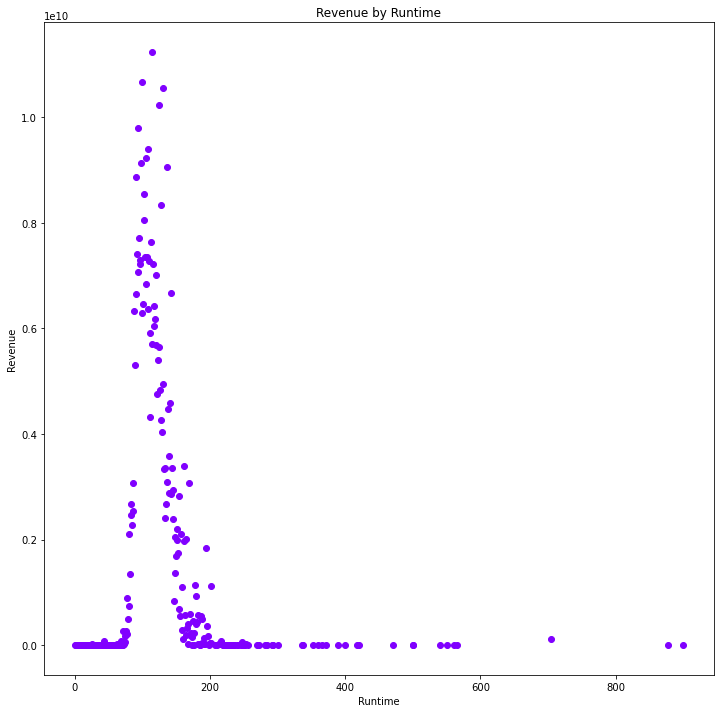

In [18]:
revenue_by_runtime = helper.generate_revenue_data_by_key('runtime', df)

fig, ax = plt.subplots(1, figsize=(12, 12))

ax.scatter(revenue_by_runtime.index, revenue_by_runtime)

ax.set_title('Revenue by Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Revenue')

#### Summary: 
- There is no correlation between revenue and runtime
- Highest revenue when runtime is about 400 / 3

---

Text(0, 0.5, 'Revenue')

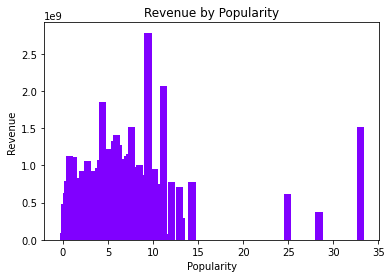

In [19]:
revenue_by_popularity = helper.generate_revenue_data_by_key('popularity', df)

plt.bar(revenue_by_popularity.index, revenue_by_popularity)

plt.title('Revenue by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

#### Summary: 
- There is no correlation between revenue and popularity
- Highest revenue when popularity is about 9

---

Text(0, 0.5, 'Revenue')

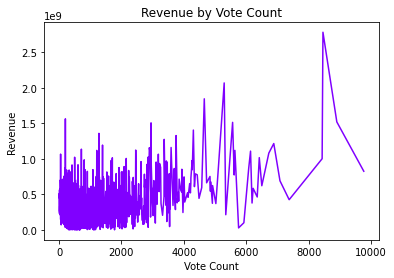

In [20]:
revenue_by_vote_count = helper.generate_revenue_data_by_key('vote_count', df)

ax = revenue_by_vote_count.plot.line(x='vote_count', y='revenue')

ax.set_title('Revenue by Vote Count')
ax.set_xlabel('Vote Count')
ax.set_ylabel('Revenue')

#### Summary: 
- There is no correlation between revenue and vote count
- Highest revenue when vote count is about 8500

---

### **Answer:**

Characteristics of a movie having high revenues:
* Vote count: ~8500
* Popularity: ~9
* Runtime: ~400 / 3
* Director(Top 3): Steven Spielberg, Peter Jackson, James Cameron
* Genres(Top 3): Action, Adventure, Comedy 
* Budget: 2 * (e**10)

---
## Question 2: Which genres are most popular from year to year? 

In [21]:
adventure_by_release_year = helper.generate_popularity_data_by_genre('Adventure', new_df)
action_by_release_year = helper.generate_popularity_data_by_genre('Action', new_df)
fantasy_by_release_year = helper.generate_popularity_data_by_genre('Fantasy', new_df)
family_by_release_year = helper.generate_popularity_data_by_genre('Family', new_df)
sf_by_release_year = helper.generate_popularity_data_by_genre('Science Fiction', new_df)
animation_by_release_year = helper.generate_popularity_data_by_genre('Animation', new_df)
war_by_release_year = helper.generate_popularity_data_by_genre('War', new_df)
thriller_by_release_year = helper.generate_popularity_data_by_genre('Thriller', new_df)
crime_by_release_year = helper.generate_popularity_data_by_genre('Crime', new_df)
mystery_by_release_year = helper.generate_popularity_data_by_genre('Mystery', new_df)
history_by_release_year = helper.generate_popularity_data_by_genre('History', new_df)
western_by_release_year = helper.generate_popularity_data_by_genre('Western', new_df)
comedy_by_release_year = helper.generate_popularity_data_by_genre('Comedy', new_df)
romance_by_release_year = helper.generate_popularity_data_by_genre('Romance', new_df)
music_by_release_year = helper.generate_popularity_data_by_genre('Music', new_df)
tm_by_release_year = helper.generate_popularity_data_by_genre('TV Movie', new_df)
foreign_by_release_year = helper.generate_popularity_data_by_genre('Foreign', new_df)
documentary_by_release_year = helper.generate_popularity_data_by_genre('Documentary', new_df)
drama_by_release_year = helper.generate_popularity_data_by_genre('Drama', new_df)
horror_by_release_year = helper.generate_popularity_data_by_genre('Horror', new_df)

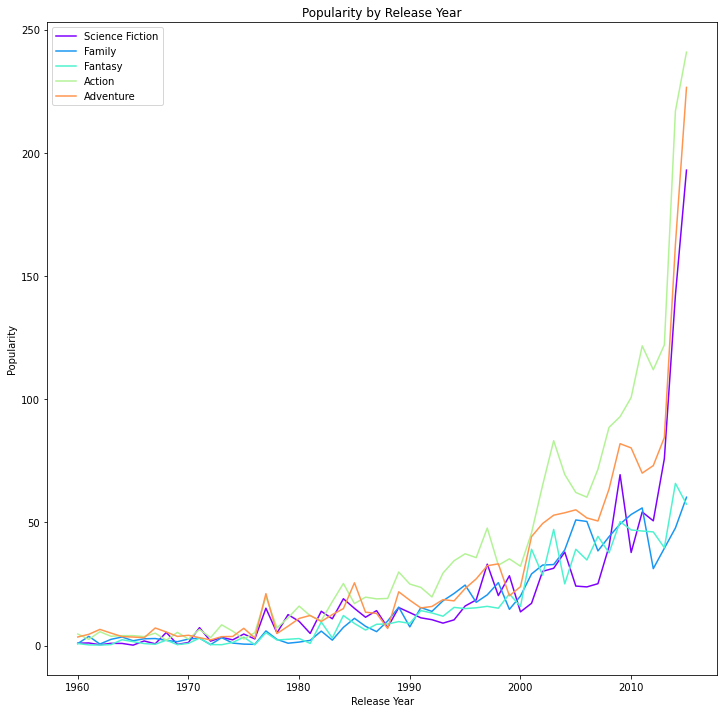

In [22]:
data_arr = [
    sf_by_release_year, 
    family_by_release_year, 
    fantasy_by_release_year, 
    action_by_release_year, 
    adventure_by_release_year]

label_arr = ['Science Fiction', 'Family', 'Fantasy', 'Action', 'Adventure']

helper.draw_popularity_graph(data_arr, label_arr)

#### Summary: 
* Over time, there are some fluctuations in popularity for Action, Adventure, Science Fiction. 
However, overall they rise in popularity.
* Compared to Action, Adventure, Science Fiction, there is no much rise in popularity for Family and Fantasy.
* Most recent popularity > 200: Action and Adventure

---

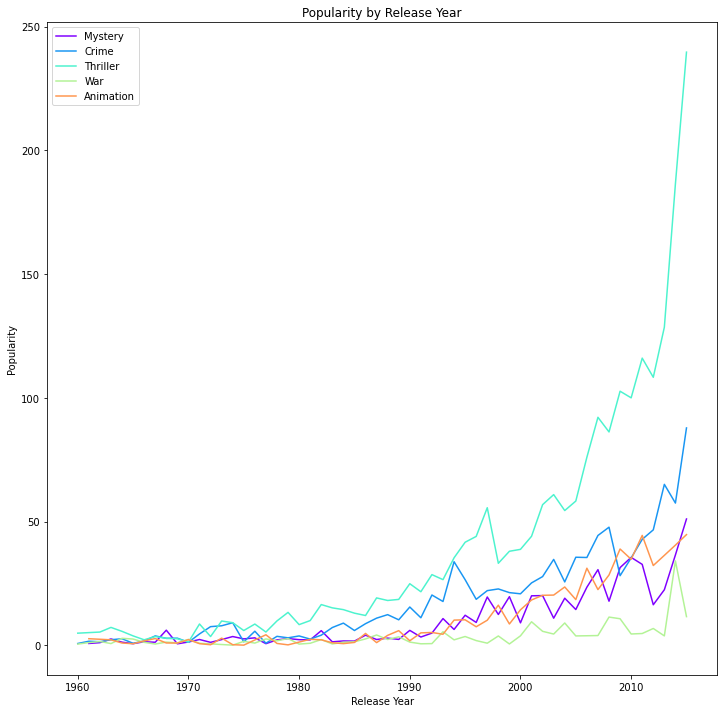

In [23]:
data_arr = [
    mystery_by_release_year, 
    crime_by_release_year, 
    thriller_by_release_year, 
    war_by_release_year, 
    animation_by_release_year]

label_arr = ['Mystery', 'Crime', 'Thriller', 'War', 'Animation']

helper.draw_popularity_graph(data_arr, label_arr)

#### Summary: 
* Over time, there are some fluctuations in popularity for Comedy, Crime, Mystery and Animation. 
However, overall they rise in popularity.
* Compared to others, War seems not popular over time even though it rose in popularity in around 2013.
* Most recent popularity > 200: Thriller

---

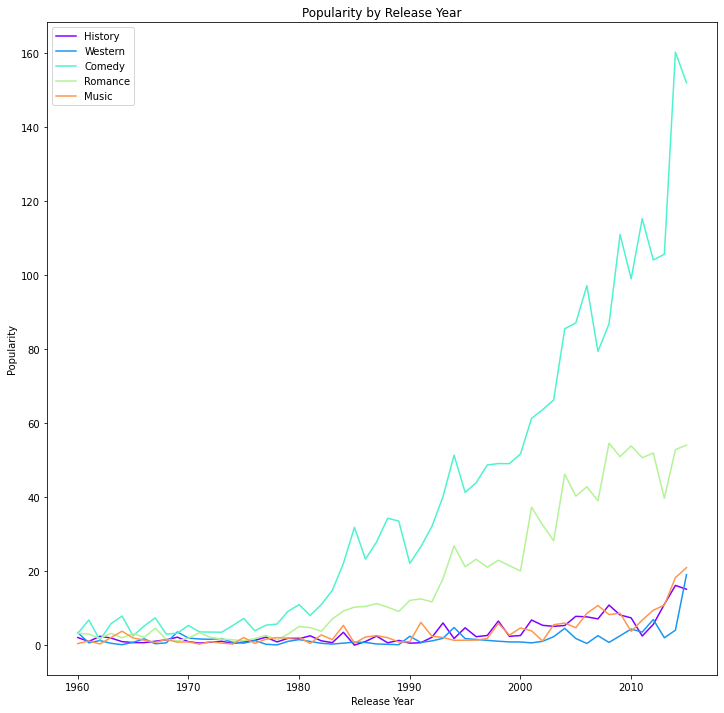

In [24]:
data_arr = [
    history_by_release_year, 
    western_by_release_year, 
    comedy_by_release_year, 
    romance_by_release_year, 
    music_by_release_year]

label_arr = ['History', 'Western', 'Comedy', 'Romance', 'Music']

helper.draw_popularity_graph(data_arr, label_arr)

#### Summary: 
* Over time, there are some fluctuations in popularity for Comedy and Romance. 
However, overall they rise in popularity.
* Compared to Comedy and Romance, History and Western as well as Music are not popular. 

---

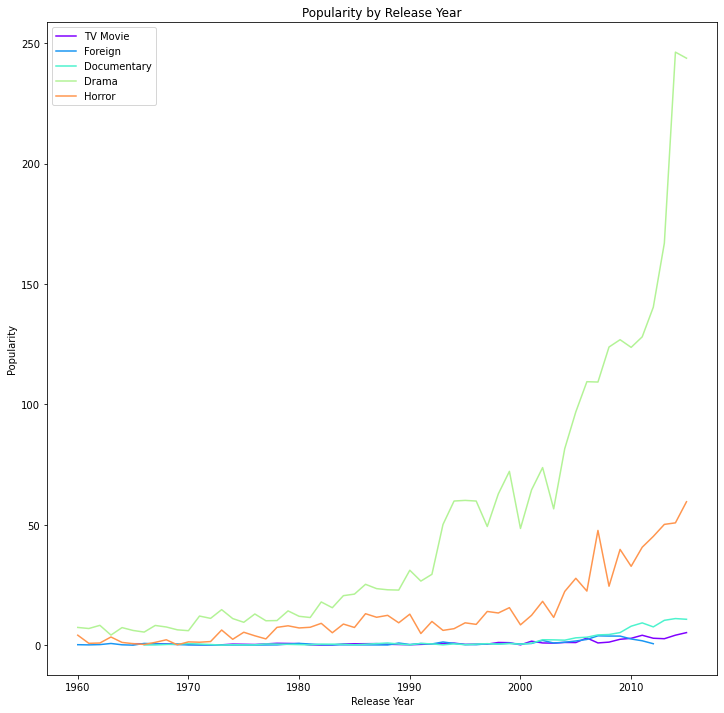

In [25]:
data_arr = [
    tm_by_release_year, 
    foreign_by_release_year, 
    documentary_by_release_year, 
    drama_by_release_year, 
    horror_by_release_year]

label_arr = ['TV Movie', 'Foreign', 'Documentary', 'Drama', 'Horror']

helper.draw_popularity_graph(data_arr, label_arr)

#### Summary: 
* Over time, Drama and Horror increase in popularity
* It seems there is rise in popularity for TV Movie and Documentary. However, there is no much difference compared to Drama and Horror
* Over time, Foreign seems never popular
* Most recent popularity > 200: Drama

---

### **Answer:**

(Choosing from genres that have most recent popularity over 200)
* Action
* Adventure
* Thriller
* Drama

## Conclusion

Except for **release year**, there is no other variable having positive or negative correlation with **revenue**. There is a positive correlation between release year and revenue. 

Properties associated with movies having high revenues are:
* vote count about 8500
* popularity score about 9
* length of runtime about 400/3
* directed by Steven Spielberg, Peter Jackson or James Cameron
* belong to one of the following genres: Action, Adventure, Comedy 
* budget about 2 * (e**10)

From year to year, Action, Adventure, Thriller and Drama are most popular

### Limitations:
* It takes really long time to get one hot encoding for cast. Therefore, did not analyse revenue by single cast in the project